# Gauß-Elimination illustriert

(Idee von [https://web.mit.edu/18.06/www/Fall17/](https://web.mit.edu/18.06/www/Fall17/) )

In [1]:
# simple Gauß-Elimination *ohne* Pivoting

function gauss!(A)
    (m, n) = size(A)
    for j ∈ 1:n                        # loop over columns
        for i ∈ j+1 : m                # loop over rows below pivot row j            
            factor = - A[i,j]/A[j,j]    # subtract a multiple of the pivot row (j)
            A[i,:] += A[j,:] .* factor   # from the current row (i) to cancel A[i,j] = Aᵢⱼ
        end
    end
    return A
end

gauss! (generic function with 1 method)

In [2]:
M = rand(5,5)

5×5 Matrix{Float64}:
 0.51181    0.538585   0.0138537  0.246841   0.65959
 0.369698   0.641606   0.266965   0.161642   0.940549
 0.0976261  0.0860432  0.104172   0.705823   0.460354
 0.988078   0.270382   0.133018   0.0857199  0.981877
 0.923085   0.126627   0.91345    0.454966   0.0992669

In [3]:
gauss!(M)

5×5 Matrix{Float64}:
 0.51181   0.538585     0.0138537   0.246841    0.65959
 0.0       0.252567     0.256958   -0.0166606   0.464104
 0.0       0.0          0.11851     0.657638    0.365208
 0.0       0.0          0.0        -5.37502    -1.61742
 0.0      -1.11022e-16  0.0         0.0        -1.99198


-------
Wir wollen uns das nun schrittweise anschauen. Eine Hilfsfunktion druckt 2 Matrizen nebeneinander mit einem Pfeil dazwischen und alle Einträge nur mit 3 Nachkommastellen:

In [4]:
using Printf


"""
Print two matrices of same size side by side with an arrow between. 
Print entries in format 8.3
"""
function print2mat(A::Matrix, B::Matrix)
    (n,m) = size(A)
    for i ∈ 1:n
        for j ∈ 1:m @printf "%8.3f" A[i,j] end
        if i == ceil(n/2)
            @printf "    ===>   "
        else
            @printf "           "
        end
        for j ∈ 1:m @printf "%8.3f" B[i,j] end
        @printf "\n"
    end
end

print2mat

In [5]:

# Test der Hilfsfunktion

A=rand(5,5)
B= rand(5,5)
print2mat(A,B)

   0.067   0.111   0.381   0.818   0.451              0.236   0.931   0.004   0.436   0.551
   0.529   0.196   0.523   0.109   0.724              0.266   0.120   0.998   0.761   0.898
   0.692   0.932   0.937   0.980   0.723    ===>      0.991   0.301   0.796   0.273   0.708
   0.750   0.185   0.504   0.891   0.628              0.397   0.816   0.170   0.760   0.778
   0.924   0.009   0.355   0.123   0.656              0.468   0.735   0.432   0.097   0.553


In [6]:

# gauss mit Ausgabe der Schritte

function gauss_steps!(A)
    (m, n) = size(A)
    for j ∈ 1:n                        # loop over columns
        for i ∈ j+1 : m                # loop over rows below pivot row j
            Aold = copy(A)              # only for print2mat
            
            factor = - A[i,j]/A[j,j]    # subtract a multiple of the pivot row (j)
            A[i,:] += A[j,:] * factor   # from the current row (i) to cancel A[i,j] = Aᵢⱼ
            
            println("\n i=", i, " j=", j)
            print2mat(Aold, A)
        end
    end
    return A
end

gauss_steps! (generic function with 1 method)

In [7]:
gauss_steps!(rand(3,3));


 i=2 j=1
   0.691   0.047   0.369              0.691   0.047   0.369
   0.803   0.798   0.447    ===>     -0.000   0.743   0.017
   0.536   0.493   0.530              0.536   0.493   0.530

 i=3 j=1
   0.691   0.047   0.369              0.691   0.047   0.369
  -0.000   0.743   0.017    ===>     -0.000   0.743   0.017
   0.536   0.493   0.530              0.000   0.456   0.243

 i=3 j=2
   0.691   0.047   0.369              0.691   0.047   0.369
  -0.000   0.743   0.017    ===>     -0.000   0.743   0.017
   0.000   0.456   0.243              0.000   0.000   0.233


In [8]:
gauss_steps!(rand(3,5));


 i=2 j=1
   0.386   0.303   0.086   0.593   0.331              0.386   0.303   0.086   0.593   0.331
   0.195   0.754   0.781   0.854   0.276    ===>      0.000   0.601   0.738   0.555   0.108
   0.727   0.802   0.975   0.961   0.153              0.727   0.802   0.975   0.961   0.153

 i=3 j=1
   0.386   0.303   0.086   0.593   0.331              0.386   0.303   0.086   0.593   0.331
   0.000   0.601   0.738   0.555   0.108    ===>      0.000   0.601   0.738   0.555   0.108
   0.727   0.802   0.975   0.961   0.153              0.000   0.231   0.812  -0.157  -0.471

 i=3 j=2
   0.386   0.303   0.086   0.593   0.331              0.386   0.303   0.086   0.593   0.331
   0.000   0.601   0.738   0.555   0.108    ===>      0.000   0.601   0.738   0.555   0.108
   0.000   0.231   0.812  -0.157  -0.471              0.000   0.000   0.529  -0.370  -0.513


In [9]:
gauss_steps!(rand(4,3));


 i=2 j=1
   0.048   0.699   0.137              0.048   0.699   0.137
   0.348   0.155   0.355    ===>      0.000  -4.914  -0.640
   0.561   0.077   0.391              0.561   0.077   0.391
   0.886   0.851   0.828              0.886   0.851   0.828

 i=3 j=1
   0.048   0.699   0.137              0.048   0.699   0.137
   0.000  -4.914  -0.640    ===>      0.000  -4.914  -0.640
   0.561   0.077   0.391              0.000  -8.095  -1.212
   0.886   0.851   0.828              0.886   0.851   0.828

 i=4 j=1
   0.048   0.699   0.137              0.048   0.699   0.137
   0.000  -4.914  -0.640    ===>      0.000  -4.914  -0.640
   0.000  -8.095  -1.212              0.000  -8.095  -1.212
   0.886   0.851   0.828              0.000 -12.052  -1.704

 i=3 j=2
   0.048   0.699   0.137              0.048   0.699   0.137
   0.000  -4.914  -0.640    ===>      0.000  -4.914  -0.640
   0.000  -8.095  -1.212              0.000   0.000  -0.158
   0.000 -12.052  -1.704              0.000 -12.052  -1.704


In [10]:

# ... und jetzt bunt!     (Bei der Konvertierung notebook -> HTML,PDF gibt es hier leider Fehlermeldungen) 

using Plots, Interact;

WebIO._IJuliaInit()

In [11]:
"""
Gauss w/o pivoting, make 'steps' steps
"""
function gauss_stepmax!(A, steps)
    (m, n) = size(A)
    for j ∈ 1:n                        # loop over columns
        for i ∈ j+1 : m                # loop over rows below pivot row j         
            factor = - A[i,j]/A[j,j]    # subtract a multiple of the pivot row (j)
            A[i,:] += A[j,:] * factor   # from the current row (i) to cancel A[i,j] = Aᵢⱼ
            steps -= 1
            steps ≤ 0 && return A
        end
    end
    return A
end

gauss_stepmax!

In [12]:
m = 40
Abig = randn(m,m)
nsteps = (m*(m-1))÷2

@manipulate for step in slider(0:(nsteps÷20):nsteps+20, label="gauss step")
    A = gauss_stepmax!(copy(Abig), step)
    heatmap(log.(abs.(A) .+ 1), color=:dense, yflip=true)
end


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["gauss step"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/hellmund/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/hellmund/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/hellmund/.julia/packages/InteractBase/h8Fwe/src/../assets/all.js"), Asset("css", nothing, "/home/hellmund/.julia/packages/InteractBase/h8Fwe/src/../assets/style.css"), Asset("css", nothing, "/home/hellmund/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fa7f6f1bc70, Task (runnable) @0x00007fa7f6f1bc70), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"39\",\"78\",\"117\",\"156\",\"195\",\"234\",\"273\",\"312\",\"351\",\"390\",\"429\",\"468\",\"507\",\"546\",\"585\",\"624\",\"663\",\"702\",\"741\",\"780\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"7240598277201446428\",\"id\":\"993

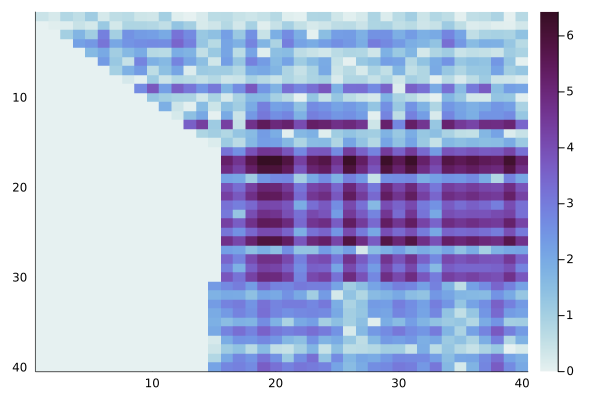

In [13]:
# Einzelbild für HTML-Version
heatmap(log.(abs.(gauss_stepmax!(copy(Abig), 470)) .+ 1), color=:dense, yflip=true)


┌ Info: Saved animation to 
│   fn = /home/hellmund/Julia/Jupyter/src/tmp.gif
└ @ Plots /home/hellmund/.julia/packages/Plots/PGQ1Y/src/animation.jl:114


Plots.AnimatedGif("/home/hellmund/Julia/Jupyter/src/tmp.gif")
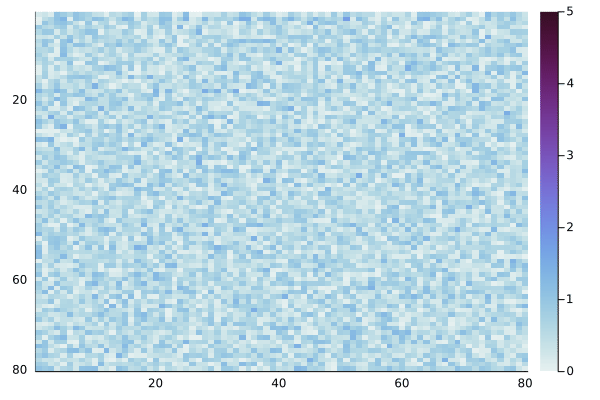

In [14]:
m=80
A=randn(m,m)
@gif for i ∈ 1:10:m*(m-1)/2 + 500      # +500 Zugabe fuer Pause am Ende
    U = gauss_stepmax!(A, i)
    heatmap( log.(abs.(U).+1), color=:dense, yflip=true,  clim=(0,5) )
end